In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/UrbanSound8K')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/UrbanSound8K'

In [ ]:

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

/content/drive/MyDrive/UrbanSound8K


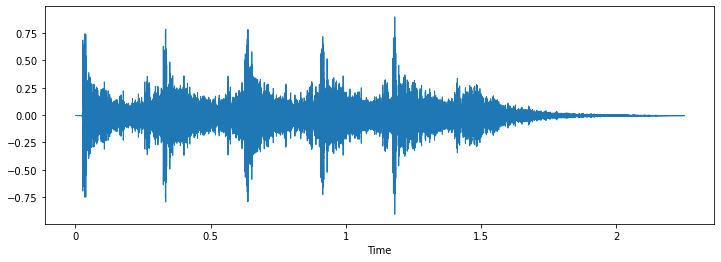

In [ ]:
loc = os.getcwd()
print(loc)
filename = loc+"/audio/fold1/7061-6-0-0.wav"
plt.figure(figsize=(12,4))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr = sample_rate)
ipd.Audio(filename)

In [ ]:
import pandas as pd

In [ ]:
metadata = pd.read_csv(loc+"/metadata/UrbanSound8K.csv")

In [ ]:
metadata.head(20)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
metadata['classID'].nunique()

10

(array([1000., 1000.,  429., 1000., 1000.,  374.,  929., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

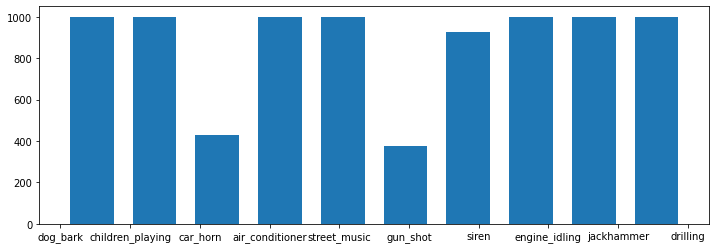

In [ ]:
%matplotlib inline
plt.figure(figsize=(12,4))
plt.hist(metadata['class'], bins = 10, rwidth = 0.7)

In [ ]:
loc = os.getcwd()
print(loc)

/content/drive/MyDrive/UrbanSound8K


In [ ]:
!pip install helpers

In [ ]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)
        
wavfilehelper = WavFileHelper()

audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join('/content/drive/MyDrive/UrbanSound8K/audio/','fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

KeyboardInterrupt: ignored

In [ ]:
audiodf.to_csv(r'/content/drive/MyDrive/UrbanSound8K/metadata/audio_df.csv',index = False)

In [ ]:
audiodf = pd.read_csv(r'/content/drive/MyDrive/UrbanSound8K/metadata/audio_df.csv')

In [ ]:
max_pad_len = 174
import numpy as np
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [ ]:
def plot_MFCC(extractFeatures, filename):
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots()
  img = librosa.display.specshow(extractFeatures, x_axis='time', ax=ax)
  fig.colorbar(img, ax=ax)
  ax.set(title='MFCC')
  plt.figure(figsize=(10,4))
  data, sample_rate = librosa.load(filename)
  img2 = librosa.display.waveshow(data, sr = sample_rate)
  return


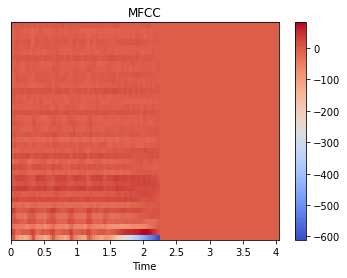

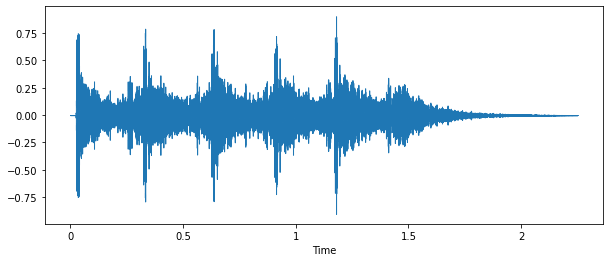

In [ ]:
f1 = '/content/drive/MyDrive/UrbanSound8K/audio/fold1/7061-6-0-0.wav'
d1 = extract_features(f1)
plot_MFCC(d1,f1) #gunshot

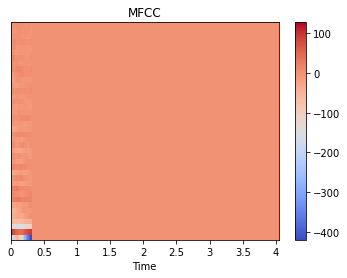

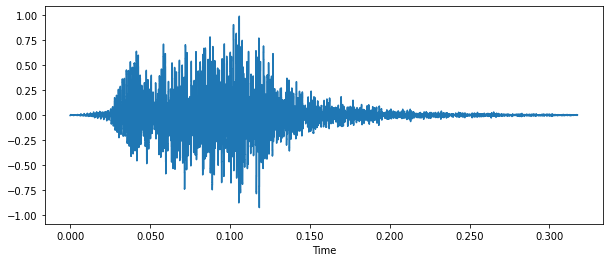

In [ ]:
f2 = '/content/drive/MyDrive/UrbanSound8K/audio/fold5/100032-3-0-0.wav'
d2 = extract_features(f2)
plot_MFCC(d2,f2) #dogbark

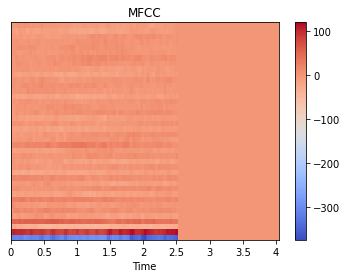

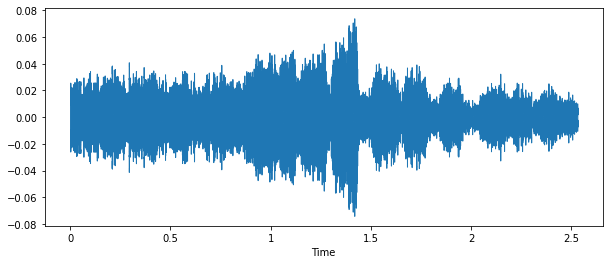

In [ ]:
f3 = '/content/drive/MyDrive/UrbanSound8K/audio/fold7/99812-1-6-0.wav'
d3 = extract_features(f3)
plot_MFCC(d3,f3) #carhorn

0

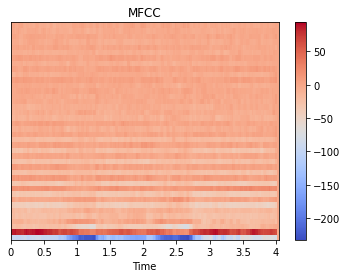

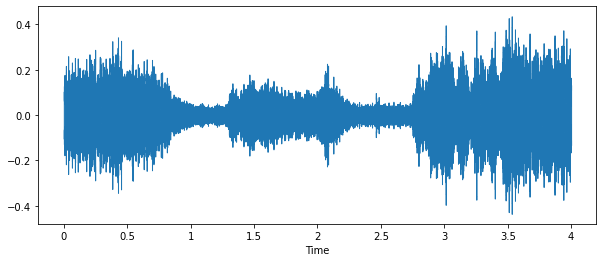

In [ ]:
f4 = '/content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-55.wav'
d4 = extract_features(f4)
plot_MFCC(d4,f4) #drilling

In [ ]:
?librosa.feature.mfcc

In [ ]:
from datetime import datetime 
start = datetime.now()

loc_ = '/content/drive/MyDrive/UrbanSound8K/audio/'

features = []

for index, row in metadata.iterrows():
    
    file_name = os.path.join('/content/drive/MyDrive/UrbanSound8K/audio/','fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

features_df = pd.DataFrame(features, columns=['feature','class_label'])

duration = datetime.now() - start

print("Training completed in time: ", duration)

NameError: ignored

In [ ]:
features_df.to_csv(r'/content/drive/MyDrive/UrbanSound8K/metadata/features_df.csv',index = False)

In [ ]:
featuresdf = pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/features_df.csv')



In [ ]:
features_df.head()

,feature,class_label
0,"[[-306.77255, -177.59209, -99.13616, -65.97198...",dog_bark
1,"[[-457.69534, -451.0248, -450.68613, -445.0000...",children_playing
2,"[[-468.0367, -467.42264, -481.04654, -486.5948...",children_playing
3,"[[-422.42215, -411.9085, -409.46243, -409.0892...",children_playing
4,"[[-438.10162, -434.47787, -443.3284, -442.6643...",children_playing


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
s = featuresdf.feature.tolist()

s[0]

'[[-3.06772552e+02 -1.77592087e+02 -9.91361618e+01 ...  0.00000000e+00\n   0.00000000e+00  0.00000000e+00]\n [ 1.27254486e+02  9.50825653e+01  7.42132721e+01 ...  0.00000000e+00\n   0.00000000e+00  0.00000000e+00]\n [-1.13722755e+02 -1.31244415e+02 -1.41885330e+02 ...  0.00000000e+00\n   0.00000000e+00  0.00000000e+00]\n ...\n [-1.93981314e+00 -3.30741382e+00  1.49638605e+00 ...  0.00000000e+00\n   0.00000000e+00  0.00000000e+00]\n [-2.36339211e+00 -6.36570930e+00 -3.48373508e+00 ...  0.00000000e+00\n   0.00000000e+00  0.00000000e+00]\n [ 2.18225718e-01  9.47752237e-01 -2.20049524e+00 ...  0.00000000e+00\n   0.00000000e+00  0.00000000e+00]]'

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = np.array(features_df.feature.tolist())
y = np.array(features_df.class_label.tolist())
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state = 42)

In [ ]:
?np.reshape()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)



num_labels = yy.shape[1]
filter_size = 2

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))


model.add(MaxPooling2D(pool_size=2))

# model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax')) 

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

model.summary()

 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 86, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 42, 32)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 41, 64)         8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 20, 64)        0

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 128

num_epochs = 72
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)



duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/72
24/24 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9951

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
?confusion_matrix


In [ ]:
?model.predict


In [ ]:
y_preds=model.predict(x_test) 
y_preds=np.argmax(y_preds, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_preds)

In [ ]:
print(cm)

[[287   0   1   1   0   4   0   1   0   9]
 [  1 111   2   1   4   0   0   1   0   2]
 [  4   1 243   2   2   2   0   0   1  26]
 [  4   2  12 262   4   0   3   1   1   8]
 [  2   2   2   1 278   1   2   6   2   5]
 [  3   0   1   1   4 274   0   0   2   5]
 [  0   0   2   2   0   0 112   0   0   1]
 [  7   1   1   0  24   1   0 276   0   4]
 [  1   0   9   4   0   1   0   0 262   6]
 [  7   0  15   2   0   2   0   1   2 283]]


In [ ]:
?sns.heatmap

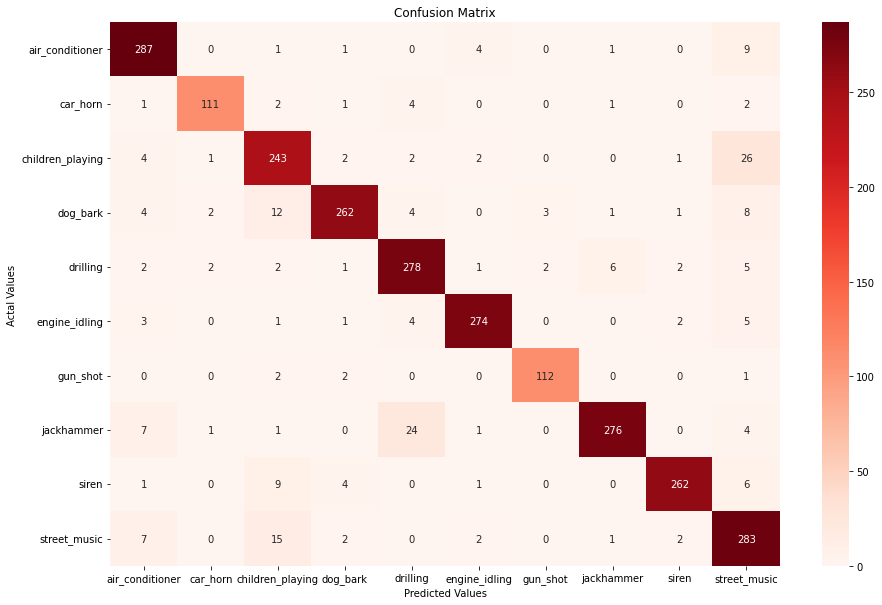

In [ ]:
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = ['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music'], 
                     columns = ['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music'])
plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True,  fmt="d", cmap="Reds")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
history = model.fit(X, Y, validation_split=0.3,random_state = 42, nb_epoch=150, batch_size=10, verbose=0)
print(history.history.keys())
print(history.history['val_loss'])

NameError: ignored

In [ ]:
model.load_weights(checkpoint_path)

NameError: ignored

In [ ]:
Train_loss=[2.2934, 1.4028, 1.1389, 0.9894, 0.8785, 0.7800, 0.7268,
0.6888,0.6139,0.5697,0.5068,0.5073,0.4654,0.4214,
0.3879,0.3719,0.3449,0.3198,0.2980,0.2849,0.2778,
0.2663, 0.2404,0.2262,0.2002,0.2022,0.2014,0.1865,
0.2021,0.1644,0.1425,0.1655,0.1661,0.1394,0.1217,
0.1139,0.1014,0.1025,0.0841,0.0968,0.1058,0.0968,
0.0877,0.1012,0.1057,0.0825,0.0855,0.0988,0.0807,
0.0616,0.0497,0.0447,0.0460,0.0390,0.0621,0.1098,
0.0600,0.0392,0.0393,0.0343,0.0339,0.0271,0.0236,
0.0264,0.0282,0.0599,0.0796,0.0341,0.0440,0.0532,0.0367,0.0251]

Val_loss=[1.5813, 1.2352, 1.0588, 0.9443, 0.8737, 0.7937, 0.8007,
0.7288,0.6648,0.6118,0.5945,0.5976,0.5203,0.5565,
0.5034,0.5358,0.4363,0.4449,0.4636,0.4889,0.4311,
0.4210,0.3981,0.3857,0.3672,0.4303,0.3664,0.5024,
0.3712,0.3759,0.3631,0.3863,0.3987,0.3888,0.3631,
0.3385, 0.3580,0.3476,0.3890,0.3861,0.4420,0.3517,
0.3628,0.4831,0.3590,0.4208,0.4158,0.3760,0.3585,
0.3810,0.3645,0.4015,0.3704,0.3580,0.6278,0.4239,
0.3844,0.3719,0.4373,0.3797,0.3688,0.3873,0.3709,
0.4090,0.3826,0.5132,0.4402,0.4162,0.4941,0.4264,0.3891,0.4023]


Train_accuracy =[0.3066   , 0.5280, 0.601 , 0.6713 , 0.7156 , 0.7490 , 0.7582, 
0.7788,0.8022 , 0.8169 , 0.8343 , 0.8336 , 0.883 , 0.8644 , 
0.8745 , 0.8832, 0.8899 , 0.8982 , 0.9080 , 0.9120 , 0.9143, 
0.9146 , 0.9274 , 0.9269 , 0.9403 , 0.9346 , 0.9350 , 0.9424,
0.9354,0.9508,0.9602,0.9485,0.9467,0.9580,0.9642,
0.9661,0.9696,0.9666,0.9789,0.9704,0.9684,0.9732,
0.9743,0.9650,0.9634,0.9756,0.9750,0.9686,0.9750,
0.9859,0.9894,0.9885,0.9890,0.9902,0.9820,0.9634,
0.9818,0.9905,0.9907,0.9920,0.9918,0.9946,0.9957,
0.9951,0.9936,0.9846,0.9764,0.9913,0.9877,0.9815,0.9899,0.9939]


Val_accuracy=[0.4622 , 0.5989 , 0.6504 , 0.6969 , 0.7042 , 0.7397 , 0.7642,
 0.7481 , 0.7798 , 0.8064 , 0.8057 , 0.8004 , 0.8286 , 0.8344 , 
0.8347 , 0.8271 , 0.8626 , 0.8531 , 0.8485 , 0.8489 , 0.8649 , 
0.8649 , 0.8805, 0.8805 , 0.8836 , 0.8683 , 0.8897 , 0.8454,
0.8859,0.8824,0.8901,0.8836,0.8798,0.8897,0.8931,
0.9050,0.8973,0.9027,0.8912,0.8981,0.8782,0.9042,
0.8989,0.8824,0.9034,0.8958,0.8874,0.9011,0.9034,
0.9011,0.9073,0.8989,0.9107,0.9053,0.8531,0.8977,
0.9115,0.9099,0.8989,0.9141,0.9103,0.9122,0.9126,
0.9118,0.9134,0.8809,0.8992,0.9069,0.8874,0.9034,0.9095,0.9115]





In [ ]:
x = []
for i in range(1,73):
  x.append(i)
x

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72]

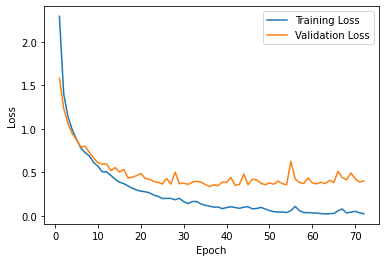

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(x)
y1points = np.array(Train_loss)
y2points = np.array(Val_loss)
plt.plot(xpoints, y1points, label = "Training Loss")
plt.plot(xpoints, y2points, label = "Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

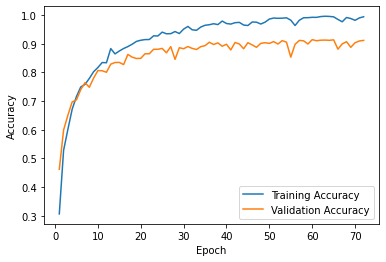

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(x)
y1points = np.array(Train_accuracy)
y2points = np.array(Val_accuracy)
plt.plot(xpoints, y1points, label = "Training Accuracy")
plt.plot(xpoints, y2points, label = "Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()